## 1.3. Aprendizaje automático - (Regresión)

En este apartado, trataremos de predecir el valor de nuestra varible numérica 'avg_salary', que correponde al salario medio de las diferentes ofertas de trabajo para posiciones relacionadas con el sector 'DATA', publicadas en el portal de empleo Glassdoor. Para ello, trataremos de encontrar los predictores y el modelo que mejor expliquen nuestra variable.

In [165]:
#Librerías a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [166]:
#Importamos el set de datos tratado en el proceso anterior '02. Limpieza y manipulación de datos'
jb = pd.read_csv('./dataset/Cleaned_job_position.csv')

### 1.3.1 Modelo de regresión lineal

En primer lugar, entrenaremos un modelo de regresión lineal con nuestras variables numéricas.

In [167]:
seed=17

In [168]:
jb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Headquarters       631 non-null    object
 1   Size               631 non-null    object
 2   Type of ownership  631 non-null    object
 3   Sector             631 non-null    object
 4   Revenue            631 non-null    object
 5   avg_salary         631 non-null    int64 
 6   same_state         631 non-null    int64 
 7   company_age        631 non-null    int64 
 8   python             631 non-null    int64 
 9   excel              631 non-null    int64 
 10  hadoop             631 non-null    int64 
 11  spark              631 non-null    int64 
 12  aws                631 non-null    int64 
 13  big_data           631 non-null    int64 
 14  job_simp           631 non-null    object
 15  State              631 non-null    object
 16  bi_tools           631 non-null    int64 
 1

In [169]:
#Definimos X,y para entrenar el modelo
features = jb.select_dtypes(include=['number']).drop(columns=['avg_salary']).columns
X = jb.select_dtypes(include=['number']).drop(columns=['avg_salary'])
y = jb['avg_salary']

In [170]:
features

Index(['same_state', 'company_age', 'python', 'excel', 'hadoop', 'spark',
       'aws', 'big_data', 'bi_tools', 'sql', 'git'],
      dtype='object')

In [171]:
print('Forma de los datos: {} {}'.format(X.shape, y.shape))

Forma de los datos: (631, 11) (631,)


#### División de Entrenamiento y Prueba

In [172]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Tamaños de entrenamiento y prueba de X: {} {}'.format(X_train.shape, X_test.shape))
print('Tamaños de entrenamiento y prueba de y: {} {}'.format(y_train.shape, y_test.shape))

Tamaños de entrenamiento y prueba de X: (504, 11) (127, 11)
Tamaños de entrenamiento y prueba de y: (504,) (127,)


In [173]:
# Ajuste de un modelo de regresión lineal múltiple
lr = LinearRegression()  # Crear el estimador de Regresión Lineal
lr.fit(X_train, y_train)  # Realizar el ajuste

# Predicción con los datos de test
y_test_pred = lr.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# Mostrar resultados
# Intercepto y coeficientes
print('\nIntercepto y coeficientes:\n{} {}'.format(lr.intercept_, lr.coef_))
# Error cuadrático medio
print('\nError Cuadrático Medio (ECM): {}'.format(mse))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_test))


Intercepto y coeficientes:
130.45177963808453 [-7.24123168 -0.06535113 -5.78339055  2.38985588  5.29857494  4.47600939
 -5.24292227 -3.34971971 -0.45023     0.3164771   2.21477776]

Error Cuadrático Medio (ECM): 1702.476411123506
Puntaje R^2 (entrenamiento): 0.020942632291849783
Puntaje R^2 (prueba): -0.024197846880173568


Tenemos malos resultados para los datos de prueba. Puede ser un señal de overfitting. Vamos a realizar regularizaciones para comprobar los resultados del modelo.

#### Regularización Ridge

In [174]:
## Regresión Ridge
ridge = linear_model.Ridge(alpha=1) # Crear un regresor Ridge
ridge.fit(X_train, y_train) # Realizar el ajuste

# Coeficientes de regresión
print(ridge.intercept_, ridge.coef_)

# Predicción
y_test_pred_ridge = ridge.predict(X_test)

# Evaluación
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2score_ridge_train = ridge.score(X_train, y_train)
r2score_ridge_test = ridge.score(X_test, y_test)

# Mostrar resultados
# Intercepto y coeficientes
print('\nIntercepto y coeficientes:\n{} {}'.format(ridge.intercept_, ridge.coef_))
# Error cuadrático medio
print('\nError Cuadrático Medio (MSE): {}'.format(mse_ridge))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_ridge_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_ridge_test))

130.36535948714942 [-7.17292865 -0.06506784 -5.70064046  2.35332327  5.21507191  4.42000092
 -5.16485948 -3.26769285 -0.42158195  0.31170493  2.19722369]

Intercepto y coeficientes:
130.36535948714942 [-7.17292865 -0.06506784 -5.70064046  2.35332327  5.21507191  4.42000092
 -5.16485948 -3.26769285 -0.42158195  0.31170493  2.19722369]

Error Cuadrático Medio (MSE): 1701.3512055607036
Puntaje R^2 (entrenamiento): 0.020939502645769714
Puntaje R^2 (prueba): -0.023520931119584754


#### Regularización Lasso

In [175]:
## Regresión Lasso
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Coeficientes de regresión
coefs_lasso = pd.Series(np.abs(lasso.coef_), features).sort_values()

# Predicción
y_test_pred_lasso = lasso.predict(X_test)

# Evaluación
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2score_lasso_train = lasso.score(X_train, y_train)
r2score_lasso_test = lasso.score(X_test, y_test)

# Mostrar resultados
# Error cuadrático medio
print('Error Cuadrático Medio (MSE): {}'.format(mse_lasso))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_lasso_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_lasso_test))

Error Cuadrático Medio (MSE): 1651.8554599487043
Puntaje R^2 (entrenamiento): 0.006455708973489349
Puntaje R^2 (prueba): 0.006255361670331028


In [176]:
print('Variables no importantes: {}'.format(sorted(coefs_lasso.index[coefs_lasso == 0].values)))
print('Variable más importante:{}'.format(coefs_lasso.index[-1]))

Variables no importantes: ['aws', 'bi_tools', 'big_data', 'excel', 'git', 'hadoop', 'python', 'spark', 'sql']
Variable más importante:same_state


### 1.3.2. Modelo de Árbol de decisión

In [177]:
from sklearn import tree

#### Conversión de variables categóricas a numéricas.

Actualmente disponemos de 7 columnas categóricas que tenemos que transformar en numéricas para poder incluirlas en el entrenamiento de nuestro modelo de árbol de decisión y ver si son determinantes para explicar nuestra variable a precedir, 'avg_salary'.

In [178]:
columnas_categoricas = jb.select_dtypes(include=['object']).columns
print(columnas_categoricas)

Index(['Headquarters', 'Size', 'Type of ownership', 'Sector', 'Revenue',
       'job_simp', 'State'],
      dtype='object')


In [179]:
#Librerías que utilizaremos para transformar as varibles categóricas a numñericas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


Utilizaremos LabelEncoder para las variables que no siguen un orden natural.
 * Headquarters
 * Type of ownership
 * Sector
 * job_simp
 * State

In [180]:
#Definimos las columnas categóricas
columnas_categoricas_le = columnas_categoricas.drop(['Size', 'Revenue'])

# Inicializar el LabelEncoder
le = LabelEncoder()

# Crear una copia del DataFrame para almacenar los resultados
jb_encoded = jb.copy()

# Crear un diccionario para almacenar el mapeo de cada columna categórica
mapeo_categorias_le = {}

# Convertir cada columna categórica en números y guardar el mapeo
for col in columnas_categoricas_le:
    jb_encoded[col] = le.fit_transform(jb_encoded[col]) + 1  # Agregar 1 para comenzar desde 1
    # Guardar el mapeo en el diccionario
    mapeo_categorias_le[col] = dict(zip(le.classes_, le.transform(le.classes_) + 1))

# Verificar el resultado
print(jb_encoded.head())

# Verificar el diccionario de mapeo
print(mapeo_categorias_le)

   Headquarters                     Size  Type of ownership  Sector  \
0            12   1001 to 5000 employees                  4      13   
1            12  5001 to 10000 employees                  2       5   
2            12   1001 to 5000 employees                  1       5   
3            10    501 to 1000 employees                  2      14   
4            12      51 to 200 employees                  1       5   

                      Revenue  avg_salary  same_state  company_age  python  \
0    Unknown / Non-Applicable         154           1           27       0   
1      $1 to $2 billion (USD)         154           0           52       0   
2  $100 to $500 million (USD)         154           1           39       1   
3  $100 to $500 million (USD)         154           0           20       1   
4    Unknown / Non-Applicable         154           1           22       1   

   excel  hadoop  spark  aws  big_data  job_simp  State  bi_tools  sql  git  
0      0       0      0   

Utilizaremos OrdinalEncoder para las variables que no siguen un orden natural.

* Size
* Revenue

In [1]:
# Definir el orden de las categorías
size_order = [
    'Unknown',
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

revenue_order = [
    'Unknown / Non-Applicable',
    'Less than $1 million (USD)',
    '$1 to $5 million (USD)',
    '$5 to $10 million (USD)',
    '$10 to $25 million (USD)',
    '$25 to $50 million (USD)',
    '$50 to $100 million (USD)',
    '$100 to $500 million (USD)',
    '$500 million to $1 billion (USD)',
    '$1 to $2 billion (USD)',
    '$2 to $5 billion (USD)',
    '$5 to $10 billion (USD)',
    '$10+ billion (USD)'
]


In [182]:
# Crear el OrdinalEncoder con el orden especificado
encoder = OrdinalEncoder(categories=[size_order, revenue_order])

# Aplicar el encoder a las columnas 'Size' y 'Revenue'
jb_encoded[['Size', 'Revenue']] = encoder.fit_transform(jb_encoded[['Size', 'Revenue']]).astype(int)

# Diccionario con el nuevo código y la descripción original
size_mapeo = {idx: categoria for idx, categoria in enumerate(size_order)}
revenue_mapeo = {idx: categoria for idx, categoria in enumerate(revenue_order)}

# Almacenar ambos en un diccionario general
mapeo_categorias_oe = {
    'Size': size_mapeo,
    'Revenue': revenue_mapeo
}
# Verificar el resultado
print(jb_encoded.head())

   Headquarters  Size  Type of ownership  Sector  Revenue  avg_salary  \
0            12     5                  4      13        0         154   
1            12     6                  2       5        9         154   
2            12     5                  1       5        7         154   
3            10     4                  2      14        7         154   
4            12     2                  1       5        0         154   

   same_state  company_age  python  excel  hadoop  spark  aws  big_data  \
0           1           27       0      0       0      0    1         0   
1           0           52       0      0       1      0    0         1   
2           1           39       1      1       0      0    1         0   
3           0           20       1      1       0      0    1         0   
4           1           22       1      1       0      0    0         0   

   job_simp  State  bi_tools  sql  git  
0         4      6         0    0    0  
1         4     10         0

In [184]:
jb_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Headquarters       631 non-null    int64
 1   Size               631 non-null    int64
 2   Type of ownership  631 non-null    int64
 3   Sector             631 non-null    int64
 4   Revenue            631 non-null    int64
 5   avg_salary         631 non-null    int64
 6   same_state         631 non-null    int64
 7   company_age        631 non-null    int64
 8   python             631 non-null    int64
 9   excel              631 non-null    int64
 10  hadoop             631 non-null    int64
 11  spark              631 non-null    int64
 12  aws                631 non-null    int64
 13  big_data           631 non-null    int64
 14  job_simp           631 non-null    int64
 15  State              631 non-null    int64
 16  bi_tools           631 non-null    int64
 17  sql             

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [186]:
#Volvemos a dividir nuestro set de datos, en este caso, incluimos tanto variables numéricas como categóricas para entrenar nuestro modelo de árbol de decisión.
X = jb_encoded.drop(columns=['avg_salary'])
y = jb_encoded['avg_salary']

In [187]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [188]:
# Crear un clasificador de árbol de decisión
clf_tree = tree.DecisionTreeRegressor()
clf_tree.fit(X_train, y_train)  # Entrenar el clasificador de árbol de decisión con los datos de entrenamiento

# Calcular y mostrar el rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento
score_tree = clf_tree.score(X_train, y_train)
print(f"Rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento: {score_tree:.4f}")

# Calcular predicciones utilizando el modelo de árbol de decisión para comparar con los valores originales
y_pred_tree = clf_tree.predict(X_test)

# Mostrar algunos ejemplos de comparación entre valores originales y predicciones por árbol de decisión
print("\nEjemplos de comparación (valor original vs. predicción por Árbol de Decisión):")
for i in range(10):  # Mostrar los primeros 10 ejemplos
    print(f"Valor original: {y[i]}, Predicción Árbol de Decisión: {y_pred_tree[i]}")

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("MSE en el conjunto de prueba:", mse)
print("MAE en el conjunto de prueba:", mae)
print("R² en el conjunto de prueba:", r2)

Rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento: 0.7308

Ejemplos de comparación (valor original vs. predicción por Árbol de Decisión):
Valor original: 154, Predicción Árbol de Decisión: 91.5
Valor original: 154, Predicción Árbol de Decisión: 76.0
Valor original: 154, Predicción Árbol de Decisión: 136.0
Valor original: 154, Predicción Árbol de Decisión: 164.0
Valor original: 154, Predicción Árbol de Decisión: 113.0
Valor original: 154, Predicción Árbol de Decisión: 92.0
Valor original: 154, Predicción Árbol de Decisión: 76.0
Valor original: 154, Predicción Árbol de Decisión: 92.0
Valor original: 154, Predicción Árbol de Decisión: 150.0
Valor original: 154, Predicción Árbol de Decisión: 105.0
MSE en el conjunto de prueba: 3027.6909448818897
MAE en el conjunto de prueba: 40.6496062992126
R² en el conjunto de prueba: -1.0800054404947965


Veamos la importancia de cada característica

In [189]:
# Obtener la importancia de las características
importances = clf_tree.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print(feature_importances_df)

              Feature  Importance
6         company_age    0.223665
14              State    0.139621
4             Revenue    0.087045
3              Sector    0.085744
17                git    0.061364
1                Size    0.055148
10              spark    0.052270
2   Type of ownership    0.045578
7              python    0.043316
13           job_simp    0.033732
8               excel    0.028099
15           bi_tools    0.027690
16                sql    0.024833
11                aws    0.021578
9              hadoop    0.018965
12           big_data    0.018586
0        Headquarters    0.017959
5          same_state    0.014806


In [190]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [191]:
#NO PUEDO USAR MATRIZ DE CONFUSION PARA ARBOL DE REGRESION

#### Escalado de datos

#### Volvemos a lanzar el arbol con los datos estandarizados

In [192]:
from sklearn.preprocessing import RobustScaler

In [193]:
# Inicializar el RobustScaler
scaler = RobustScaler()

# Ajustar el scaler en los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo en los datos de entrenamiento escalados
clf_tree.fit(X_train_scaled, y_train)

# Predecir en los datos de prueba escalados
y_pred_tree_scaled = clf_tree.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred_tree_scaled)
mae = mean_absolute_error(y_test, y_pred_tree_scaled)
r2 = r2_score(y_test, y_pred_tree_scaled)

print("MSE en el conjunto de prueba:", mse)
print("MAE en el conjunto de prueba:", mae)
print("R² en el conjunto de prueba:", r2)

MSE en el conjunto de prueba: 3213.26968503937
MAE en el conjunto de prueba: 41.24803149606299
R² en el conjunto de prueba: -1.207496917067148


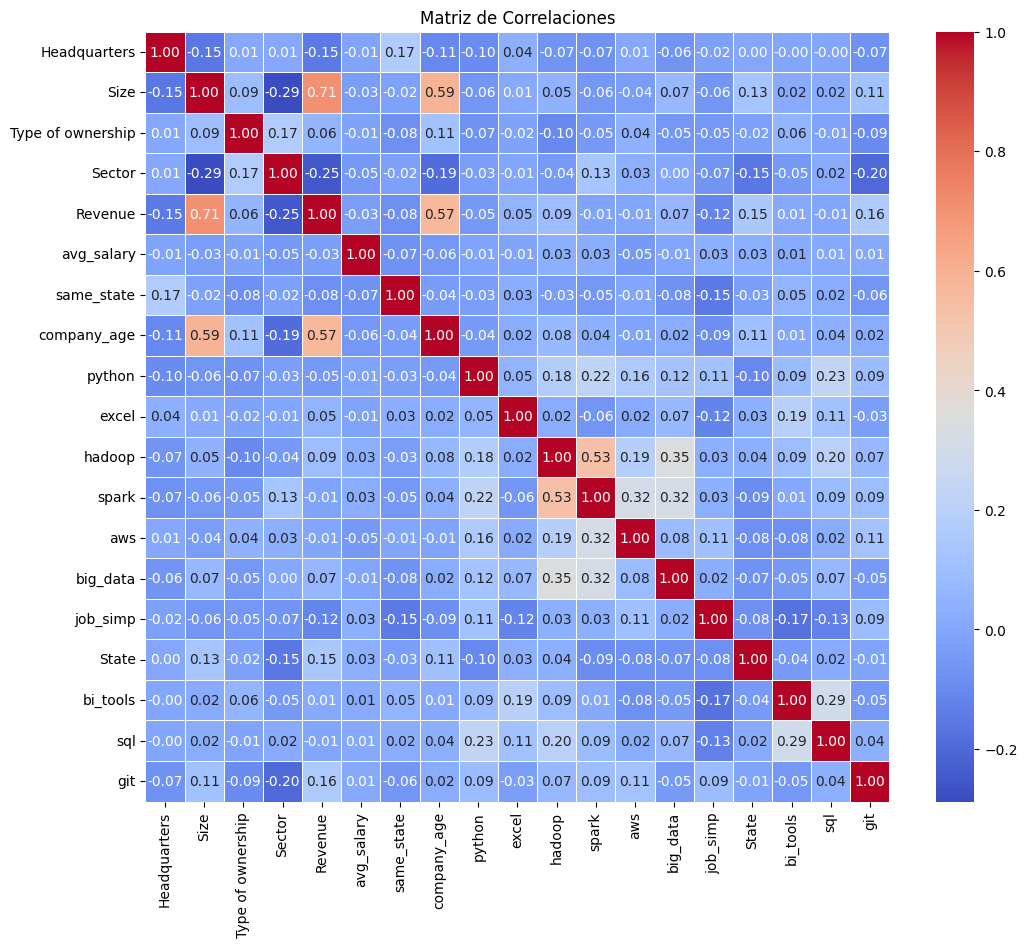

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
columnas_numericas = jb_encoded.select_dtypes(include=['number'])

# Calcular la matriz de correlaciones
matriz_correlaciones = columnas_numericas.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

In [231]:
columnas_eliminar = ['python','excel','spark','aws','big_data','job_simp','bi_tools','sql','git','hadoop','same_state','Headquarters']

In [232]:
jb_new = jb_encoded.drop(columns=columnas_eliminar)

In [233]:
jb_new.head()

,Size,Type of ownership,Sector,Revenue,avg_salary,company_age,State
0,5,4,13,0,154,27,6
1,6,2,5,9,154,52,10
2,5,1,5,7,154,39,4
3,4,2,14,7,154,20,4
4,2,1,5,0,154,22,6


In [234]:
#Volvemos a dividir nuestro set de datos, en este caso, incluimos tanto variables numéricas como categóricas para entrenar nuestro modelo de árbol de decisión.
X = jb_new.drop(columns=['avg_salary'])
y = jb_new['avg_salary']


In [235]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [237]:
# Crear un clasificador de árbol de decisión
clf_tree = tree.DecisionTreeRegressor()
clf_tree.fit(X_train, y_train)  # Entrenar el clasificador de árbol de decisión con los datos de entrenamiento

# Calcular y mostrar el rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento
score_tree = clf_tree.score(X_train, y_train)
print(f"Rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento: {score_tree:.4f}")

# Calcular predicciones utilizando el modelo de árbol de decisión para comparar con los valores originales
y_pred_tree = clf_tree.predict(X_test)

# Mostrar algunos ejemplos de comparación entre valores originales y predicciones por árbol de decisión
print("\nEjemplos de comparación (valor original vs. predicción por Árbol de Decisión):")
for i in range(10):  # Mostrar los primeros 10 ejemplos
    print(f"Valor original: {y[i]}, Predicción Árbol de Decisión: {y_pred_tree[i]}")

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("MSE en el conjunto de prueba:", mse)
print("MAE en el conjunto de prueba:", mae)
print("R² en el conjunto de prueba:", r2)

Rendimiento del modelo de árbol de decisión en el conjunto de entrenamiento: 0.6848

Ejemplos de comparación (valor original vs. predicción por Árbol de Decisión):
Valor original: 154, Predicción Árbol de Decisión: 102.66666666666667
Valor original: 154, Predicción Árbol de Decisión: 271.0
Valor original: 154, Predicción Árbol de Decisión: 136.0
Valor original: 154, Predicción Árbol de Decisión: 167.66666666666666
Valor original: 154, Predicción Árbol de Decisión: 113.0
Valor original: 154, Predicción Árbol de Decisión: 113.0
Valor original: 154, Predicción Árbol de Decisión: 76.0
Valor original: 154, Predicción Árbol de Decisión: 92.0
Valor original: 154, Predicción Árbol de Decisión: 150.0
Valor original: 154, Predicción Árbol de Decisión: 102.5
MSE en el conjunto de prueba: 2970.1691738170007
MAE en el conjunto de prueba: 39.99008717660292
R² en el conjunto de prueba: -1.0404883302811143


In [238]:
# Obtener la importancia de las características
importances = clf_tree.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print(feature_importances_df)

             Feature  Importance
4        company_age    0.249927
5              State    0.214820
2             Sector    0.184618
3            Revenue    0.153146
0               Size    0.119127
1  Type of ownership    0.078362


CONCLUSIÓN: Tras la fase de entrenamiento, creación y evaluación de modelos, dado que estamos obteniendo resultados de accuracy muy bajos, se ha llegado la conclusión que el set de datos no está preparado para el propósito esperado. De esta manera, en este punto del trabajo, decidimos comenzar de nuevo, creando una serie de datos sintéticos para generar modelos de predicción de clasificación que explicaremos en la siguiente fase de '2.1. Limpieza y manipulación de datos - (Clasificación)'.